*Ceci est le classeur numéro **6** de la matière Langage C, à réaliser dans le temps de la sixième séance de Langage C.*

Ce dernier classeur contient les points suivants :
 - L'outile `make`
 - Présentation du projet de C


## Faciliter la compilation avec `make`

Vous l'aurez peut-être remarqué, le mécanisme de compilation séparée rend la compilation un peut fastidieuse. Cela requiert de compiler chaque fichier à la main soi-même, ou alors de faire un script, mais auquel cas on recompile tout à chaque fois, même si on a pas besoin...

Pour faciliter la compilation (de C mais aussi d'autres langages), on utilise généralement l'outil [`make`](https://en.wikipedia.org/wiki/Make_(software)), qui permet est un très haut degré d'automatisation. Cet outil se base sur un fichier dans un langage particulier, qui s'appelle `Makefile`.

Dans un répertoire contenant un fichier nommé `Makefile`, faire `make` dans la console invoque l'outil avec ce fichier là comme entrée. On peut aussi choisir un Makefile particulier avec `make -f mon_makefile`.

### Les règles

Un `Makefile` se compose d'un ensemble de _règles_. En ce sens, le langage du `Makefile` est un langage déclaratif : on décrit la logique du problème plutôt que la manière exacte de le résoudre.

Une règle prend la forme générale suivante :

```makefile
<cible>: <dépendance 1> <dépendance 2> ...
    <instruction 1>
    <instruction 2>
    ...
```

La _cible_ de la règle est à la fois son nom (qui permet de l'appeler) et le nom du fichier que la règle crée.

Les _dépendances_ de la règle sont tous les fichiers dont la règle a besoin pour fonctionner. Bien sûr, ces fichiers peuvent être d'autres cibles, et `make` calculera lui-même dans quel ordre appeler les règles pour que ça fonctionne.

À noter qu'une règle peut très bien ne pas définir de dépendance.

Les _instructions_ sont exécutées, dans l'ordre, lorsque la règle est _appelée_.

À noter qu'on peut mettre des commentaires dans le `Makefile`, en utilisant le `#`.

<br>

**ATTENTION : L'INDENTATION DES INSTRUCTIONS SE FAIT AVEC UNE _TABULATION_, PAS AVEC DES ESPACES !!**

<br>

Lorsqu'on appelle `make`, l'outil récupère la _première_ règle du `Makefile` et l'exécute. L'exécution d'une règle suit le schéma suivant :
 1. Faire la liste des dépendances **moins récentes** que la cible (récursivement), ainsi que des dépendances non remplies (fichier non-présent sur le disque)
 2. Pour chaque dépendance manquante, on vérifie s'il existe une règle dont elle est la cible ; si c'est le cas, on l'exécute, sinon, on s'arrête avec une erreur
 3. Une fois qu'on a toutes les dépendances, et si les règles appelées (le cas échéant) n'ont pas elles-mêmes causé une erreur, on exécute les instructions de la règle, dans l'ordre

À noter qu'on s'attend à ce que les instructions de la règle entraînent la création du fichier _cible_. C'est généralement le cas puisque ces instructions font de la compilation.

<br>

Prenons un exemple. Placez-vous dans le répertoire `make-1` du dossier de matériel associé au classeur (`classeur-2-3-materiel`). Ce dossier contient un petit module `affine` et un fichier `main.c`, ainsi qu'un fichier `Makefile`.

Voici le contenu du `Makefile` :
```makefile
test: main.o affine.o
	gcc main.o affine.o -o test

main.o: main.c
	gcc -c main.c -o main.o

affine.o:
	gcc -c affine.c -o affine.o
```

On a donc trois règles ici :
 - la règle `test`, qui utilise `gcc` pour lier les fichiers `main.o` et `affine.o` afin de créer l'exécutable `test`, et qui dépend donc de ces deux fichiers
 - la règle `main.o`, qui utilise `gcc` pour compiler le fichier `main.c` vers le fichier `main.o`, et dépend donc de `main.c`
 - la règle `affine.o`, qui utilise `gcc` pour compiler le fichier `affine.c` vers le fichier `affine.o`

Si on exécute `make`, on voit s'afficher les étapes que l'outil réalise :
```
> make
gcc -c main.c -o main.o
gcc -c affine.c -o affine.o
gcc main.o affine.o -o test
```

`make` a bien essayé d'exécuter la règle `test`, qui nécessite les fichiers `main.o` et `affine.o`. Comme ceux-ci n'existent pas, `make` a cherché à les créer en appelant les règles correspondantes : `main.o`, puis `affine.o`. L'outil a ensuite exécuté les instructions de la règle `test`.

<br>

Essayez de lancer `make` à nouveau : l'outil vous dit `nothing to be done.` : il détecte que le fichier `test` est plus récent que ses dépendances, qui elles-mêmes sont plus récentes que leurs dépendances respectives, donc il n'y a rien à faire.

Modifier le fichier `main.c` (en changeant la valeur d'une des variables par exemple) puis relancez `make` : l'outil détecte tout seul que le fichier `main.c` a été modifié, et qu'il faut donc recompiler `main.o` (première instruction) puis recompiler l'exécutable `test`.

De même, modifiez le contenu du fichier `affine.c` et relancez `make` : il ne se passe rien, car `affine.c` n'a pas été marqué en dépendance de `affine.o`, et donc `make` ne vérifie pas s'il a été mis à jour.

<br>

À noter que `make` n'exécute _que_ la première règle du fichier. Si cette règle n'en appelle pas d'autre, `make` n'ira pas plus loin... L'ordre dans lequel les règles sont définies est donc particulièrement important !

Essayez d'inverser l'ordre des règles `main.o` et `test`. Supprimez les fichiers `.o` et le fichier `test` (pour forcer `make` à ré-exécuter les règles) et relancez `make` : seule la règle `main.o` est exécutée !

Autre note importante : `make` s'interrompt dès la première erreur qu'il rencontre, ce qui évite d'essayer de compiler ou de linker des fichiers qui n'existent pas.

### Les variables

Pour se faciliter la vie, le langage des `Makefile` permet de définir et d'utiliser des variables. Ces variables fonctionnent un peu comme les macros de C : `make` fait une sorte de rechercher-remplacer quand on fait appel à une variable.

Pour déclarer une variable, on utilise la syntaxe suivante
```makefile
VARIABLE=texte de la variable
```

Le nom de variable est donné tout en majuscule par convention (ce n'est pas obligatoire), et le contenu de la variable est donné directement, sans guillemet ou autre.

Pour faire référence à une variable, on utilise la syntaxe : `$(VARIABLE)`.

<br>

Comme les variables fonctionnent en mode rechercher-remplacer, on peut vraiment utiliser les variables pour tout et n'importe quoi. Par exemple, on définit souvent des variables pour le compilateur et l'éditeur de lien et pour leurs options respectives, pour rendre le Makefile plus facilement configurable :
```makefile
CC=gcc                    # Compilateur C à utiliser
LD=gcc                    # Éditeur de lien à utiliser
CFLAGS=-g -Wall -I../..   # Options du compilateur
LDFLAGS=-L../.. -lt       # Options du linker

test: main.o affine.o
    $(LD) main.o affine.o -o test $(LDFLAGS)    # les options du linker sont données en dernier

main.o: main.c
    $(CC) $(CFLAGS) main.c -o main.o

affine.o: affine.c
    $(CC) $(CFLAGS) affine.c -o affine.o
```

Si on exécute ce Makefile, on verra que `make` remplace bien les variables par leurs valeurs !

<br>

Les variables peuvent aussi apparaître dans les dépendances et dans les cibles. Par exemple, lorsqu'un projet a beaucoup de fichiers `.o`, il peut être intéressant de les regrouper dans une variable. On peut en profiter pour faire que la cible principale soit configurable :
```makefile
CC=gcc                    # Compilateur C à utiliser
LD=gcc                    # Éditeur de lien à utiliser
CFLAGS=-g -Wall -I../..   # Options du compilateur
LDFLAGS=-L../.. -lt       # Options du linker
TARGET=test               # Cible principale
OBJECTS= main.o affine.o

$(TARGET): $(OBJECTS)
    $(LD) $(OBJECTS) -o $(TARGET) $(LDFLAGS)

main.o: main.c
    $(CC) $(CFLAGS) main.c -o main.o

affine.o: affine.c
    $(CC) $(CFLAGS) affine.c -o affine.o
```

#### Variables automatiques

Les variables automatiques sont un mécanisme très puissant de `make`. Il s'agit de variables que `make` renseigne automatiquement au fur et à mesure de l'exécution. Il en existe [plein](https://www.gnu.org/software/make/manual/html_node/Automatic-Variables.html), mais il y en a 3 qui nous intéressent particulièrement :
 - `$@` contient le _nom de la cible actuelle_
 - `$<` le nom de la _première dépendance_
 - `$^` la liste de _toutes les dépendances_, séparées par des espaces

Pour illustrer ces variables, reprenons le Makefile d'exemple de tout à l'heure.

Ajoutez la ligne `@echo "Cibles : $@, dépendances : $^"` juste après l'instruction de la règle `test`. Supprimez les `.o` et l'exécutable `test` et faites `make` : on peut voir s'afficher le message avec la bonne cible et les bonnes dépendances.

<br>

Grâce au mécanisme de variables automatiques, on peut réécrire les règles de façon à les rendre plus facile à changer et à garder cohérentes :
```makefile
test: main.o affine.o
    gcc $^ -o $@

main.o: main.c
    gcc -c $< -o $@     # gcc n'accepte qu'un seul fichier donc au cas où on ne prend que la première dépendance

...
```

Avec ce système, il est plus simple de modifier les dépendances et les cibles ; on n'a plus besoin de penser à modifier les instructions aussi !

### Schémas de règles

On remarque que, avec les variables automatiques, les règles se mettent à beaucoup se ressembler. Si on avait 20 fichiers `.c`, on devrait écrire 20 fois la même règle en théorie... Mais heureusement en pratique, il existe les schémas de règle.

Un schéma de règle est une règle où la cible et la dépendance se présentent sous la forme d'un _pattern_ (un schéma).

Globalement la cible d'un schéma de règle est un "texte à trou" ; `make` comble tout seul le trou, que l'on peut réutiliser dans une dépendance.

Le schéma de règle le plus commun est le suivant :
```makefile
%.o: %.c
    gcc -c $< -o $@
```

La cible de cette règle est en fait n'importe quel fichier qui a l'extension `.o`. La dépendance de cette règle est le fichier qui a le même nom de base (tout ce qu'il y a _avant_ le `.o`, représenté par le `%`) mais avec l'extension `.c`.

Avec en plus les variables automatiques, on a bien **une** règle qui remplace _toutes_ règles de la forme `machin.o: machin.c` : c'est très efficace, et on n'a pas plus à copier coller des règles !

#### Une note sur le non-déterminisme

Avec les schémas de règle, il peut arriver qu'on ne sache pas quelle règle est utilisé lorsqu'on explore les dépendances. Prenon l'exemple suivant :
```makefile
test: main.o affine.o
    $(LD) $^ -o $@

main.o: main.c
    @echo "Cas spécial de la règle main"
    $(CC) -c $< -o $@

%.o: %.c
    $(CC) -c $< -o $@
```

Lorsque `make` cherche à résoudre les dépendances de la cible `test`, il va chercher la _première_ règle qui correspond à `main.o` (donc ici la règle `main.o`). Si on échange les règles `main.o` et `%.o`, alors il n'y a aucune chance que la règle `main.o` soit exécutée : la première règle qui permet de créer le fichier `main.o` est la règle `%.o`.

Il peut être intéressant de préciser certaines règles, si par exemple un fichier nécessite des options particulières comparé à d'autres.

<br>

À noter qu'on peut très bien créer des pattern un peu plus complexe. Par exemple :
```makefile
test: main.o affine.o
    $(LD) $< -o $@ -O2

test_unitaire: test_affine.o affine.o
    $(LD) $< -o $@ -L../.. -lt -O0

# Schéma spécial pour les fichiers test_*
test_%.o: test_%.c
    $(CC) -Wall -Wextra -pedantic -c $< -o $@

# Schéma pour les autres fichiers
%.o: %.c
    $(CC) -c $< -o $@
```

### Appel explicite de règle et fausses règles

Dans l'exemple précédent, vous avez peut-être remarqué qu'il y a deux règles qui produisent un exécutable. Or, on l'a vu, lorsqu'on appelle `make`, il n'exécute _que la première règle du fichier_. Comment faire alors si on veut compiler `test_unitaire` ?

En fait, on peut passer la règle à exécuter en paramètre de `make` (on appel ça de _l'appel explicite_) :
```
> make
> make test_unitaire
> make main.o
```

Dans le premier cas, c'est la règle `test` qui exécutée, dans le deuxième cas, c'est la règle `test_unitaire`. On peut même demander une règle qui correspond à un schéma : c'est comme si elle était appelée depuis une autre règle !

Par ailleurs, lorsqu'on a plusieurs règles qu'on veut appeler, on peut toujours mettre les cibles en dépendance de la première règle du fichier, par exemple :
```makefile
all: test test_unitaire

test: main.o affine.o
    $(LD) $< -o $@ -O2

test_unitaire: test_affine.o affine.o
    $(LD) $< -o $@ -L../.. -lt -O0

...
```

Lorsqu'on fait `make` ici, la règle `all` est exécutée, qui elle-même appelle `test` et `test_unitaire`.

Il y a un problème cependant : la règle `all` ne produit pas elle-même de fichier, en fait, elle n'a même pas d'instructions !

Cela pose un problème : lorsque `make` cherche à savoir s'il faut exécuter la règle ou pas, il se base sur le nom de la règle. Comme `all` n'est pas un fichier, ça le gène dans son calcul.

Ce qu'on voudrait, c'est _toujours_ exécuter `all`. `all` ne se comporte pas comme les autres règles ; on dit que c'est une _fausse_ règle (_phony_ en anglais), et on la marque avec la syntaxe suivante :
```makefile
.PHONY: all
```

En marquant la règle comme _phony_, on indique à `make` que ce n'est pas une règle qui produit un fichier. L'outil ne cherchera pas à vérifier si le fichier existe, et exécutera la règle tout le temps.

<br>

Les mécanismes d'appel explicite et de fausse règle mis ensembles permettent de définir des règles spéciales qui correspondent à des instructions et ne créent pas de fichier, à la façon de "scripts". Par exemple, on crée souvent une fausse règle `clean`, qui supprime les artefacts de compilation (ce qui évite à l'utilisateur de faire des `rm` lui-même).
```makefile
.PHONY: all clean

...

clean:
    -rm *.o             # on met un - avant le rm pour dire à make d'ignorer les erreurs (si le rm n'a pas fonctionné)
    -rm test
    -rm test_unitaire
```

La règle `clean` s'appelle alors uniquement explicitement :
```
> make clean
```

## Projet : algorithme du plus court chemin

Étant donné un graphe orienté pondéré (avec un poids sur les arcs), il existe un algorithme optimal qui trouve le chemin qui minimise le poids total entre un point de départ et un point d'arrivée. [Cet algorithme](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) a été proposé par Edsger Dijkstra en 1956 et est toujours utilisé de nos jours dans les tâches de type planification de chemin (à quelques heuristiques près), puisqu'il n'en existe pas de mieux !

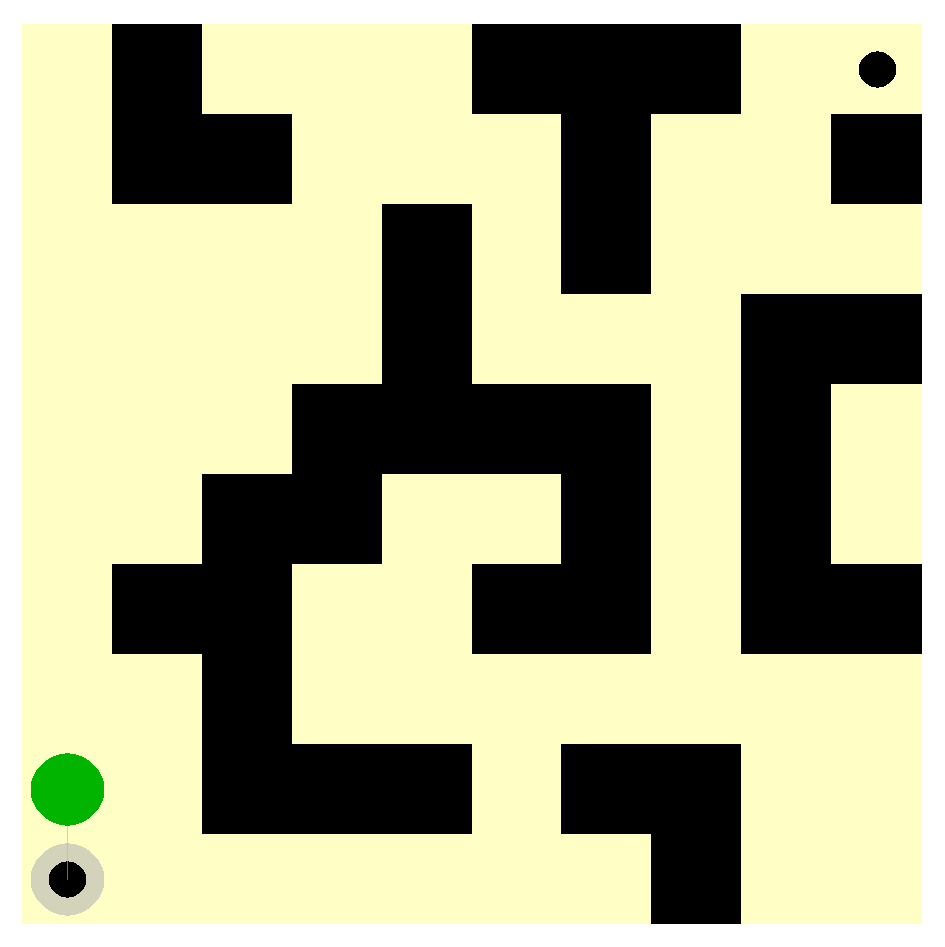

_(animation obtenue avec l'application ; en gris : noeuds visités, en vert : noeud en cours de considération, en rouge : voisin en cours de considération)_

### Définitions et notations

Un graphe $G = \langle N, E \rangle$ se compose d'un ensemble de noeuds ($N$) et d'arêtes ($E$). Une arête $e \in E$ consiste en un noeud de départ $src(e) \in N$ et un noeud d'arrivée $tgt(e) \in N$.

Soit un noeud $n \in N$, l'ensemble des voisins de $n$ est noté $neigh(n)$, et correspond à l'ensemble des noeuds tel qu'il existe une arête $e$ de source $src(e) = n$ et de destination ce noeud ($neigh(n) = \{ n_v \mid n_v \in N, \exists e \in E, src(e) = n \wedge tgt(e) = n_v \}$).

<br>

Dans les faits, notre graphe sera en fait une _heightmap_ (voir Exercice 2 du classeur 5). Cela signifie donc qu'un noeud $n$ correspond à des coordonnées cartésiennes entières $(i,j)$ et est associé à une _hauteur_ $h(n)$ (ou $h(i,j)$).

Pour tout couple de noeuds voisins $(n_1, n_2)$, on appelle _coût_ la grandeur :
$$cout(n_1,n_2) = d(n_1,n_2) + \max(h(n_2) - h(n_1), 0)$$

Dit autrement, le coût pour se déplacer du noeud $n_1$ vers le noeud $n_2$ est égal à la distance qui sépare les deux noeuds plus le différentiel de hauteur entre les deux noeuds, si ce dernier est positif.

### Algorithme de Dijkstra

Soit un graphe $G = \langle N, E \rangle$ et deux noeuds de départ et d'arrivée $n_d, n_a \in N$. L'algorithme de Dijkstra consiste à calculer le coût minimal entre le noeud de départ et chaque noeud du graphe, en enregistrant au passage de quel noeud on vient pour minimiser ce coût (qu'on appellera le _noeud précédent_ du noeud en question). Pour cela, on utilise deux collections (des listes chaînées, dans notre cas) : la collection des noeuds _à visiter_ ($AVisiter$) et la collection des noeuds _déjà visités_ ($Visités$). Chaque noeud $n$ de ces collections stock :
 1. le coût total calculé pour arriver à ce noeud depuis le noeud de départ ($cout_{AVisiter}(n)$, $cout_{Visités}(n)$)
 2. le noeud précédent associé ($prec_{AVisiter}(n)$, $prec_{Visités}(n)$).

Si un noeud n'est pas dans une collection, le cout associé à ce noeud est infini par convention ($n \notin AVisiter \Rightarrow cout_{AVisiter}(n) = \infty$).

L'idée est que, pour tout noeud de la collection $Visités$, le coût associée à ce noeud est bien le coût minimal, et le noeud précédent associé est celui dont on provient en empruntant le plus court chemin. Le coût associé au noeud de destination est alors le plus faible coût, et en remontant le chemin à partir du noeud de destination, on retrouve le plus court chemin entre la source et la destination.

L'algorithme se découpe donc en deux partie : calculer les coûts minimaux pour chaque noeud (algorithme "D") et calculer le chemin entre $n_d$ et $n_a$ (algorithme "C").

Voici les étapes pour la partie "D" :
 + (D-1) Ajouter à $AVisiter$ le noeud de départ $n_d$, avec comme coût 0 et comme précédent lui-même (par convention)
 + (D-2) Tant qu'il existe un noeud dans $AVisiter$, faire :
   - (D-2.1) Chercher un noeud $n_c \in AVisiter$ dont le coût associé $cout(n)$ est minimal ; on appelle $n_c$ le _noeud courant_
   - (D-2.2) Ajouter $n_c$ dans $Visités$, avec $cout_{Visités}(n_c) = cout_{AVisiter}(n_c)$ et $prec_{Visités}(n_c) = prec_{AVisiter}(n_c)$
   - (D-2.3) Supprimer $n_c$ de $AVisiter$
   - (D-2.4) Pour chaque voisin de $n_c$ non déjà visité, $n_v \in neigh(n_c) \setminus Visités$, faire :
     * (D-2.4.1) Calculer le coût total pour aller du noeud de départ $n_d$ à $n_v$ en passant par $n_c$ : $\delta^\prime = cout_{Visités}(n_c) + cout(n_c, n_v)$
     * (D-2.4.2) Soit $\delta = cout_{AVisiter}(n_v)$, le coût actuel de $n_d$ à $n_v$ (potentiellement infini si $n_v$ n'est pas dans $AVisiter$)
     * (D-2.4.3) Si $\delta^\prime < \delta$, alors $n_c$ est un meilleur précédent pour $n_v$ : changer les valeurs associée à $n_v$ dans $AVisiter$ de façon à enregistrer le noeud courant comme précédent de $n_v$ et $\delta^\prime$ comme nouveau coût pour $n_v$ : $cout_{AVisiter}(n_v) = \delta^\prime$, $prec_{AVisiter}(n_v) = n_c$ <br>
       (on notera que si $n_v \notin AVisiter$, cette dernière étape ajoute $n_v$ à $AVisiter$)

Une fois que la boucle est terminée, $Visités$ contient tous les noeuds atteignables depuis $n_d$, et pour tout $n \in Visités$, $cout_{Visités}(n)$ est optimal. En particulier, $cout_{Visités}(n_a)$ est le coût minimal pour aller de $n_d$ et $n_a$.

On peut maintenant construire le chemin qui va de $n_d$ à $n_a$, en partant de $n_a$ et en ajoutant récursivement le précédent du dernier noeud ajouté. Pour cela, on utilise une collection $Chemin$, du même type que $AVisiter$ et $Visités$ (donc où chaque noeud est associé à un $cout_{Chemin}$ et un $prec_{Chemin}$).

Soit le chemin courant $Chemin$ et le noeud que l'on visite $n$. On construit le chemin de $n_d$ à $n$ avec l'algorithme "C" :
 + (C-1) Soit $n_p = prec_{AVisiter}(n)$
 + (C-2) Si $n_p = n_d$, on s'arrête ici
 + (C-3) Sinon :
   - (C-3.1) Construire le chemin de $n_d$ à $n_p$ (appel récursif)
   - (C-3.2) Ajouter au chemin le noeud $n_p$ (avec $cout_{Chemin}(n_p) = cout_{Visités}(n_p)$ et $prec_{Chemin}(n_p) = prec_{Visités}(n_p)$)

Pour construire tout le chemin, on appelle l'algorithme C avec $n = n_a$.

### Travail demandé

Le but du projet est de développer en C l'algorithme de Dijkstra dans une grille. Vous devrez pour cela vous servir des modules `coord` (développé lors du classeur 3) et `grille` (développé dans le classeur 5).

Pour pouvoir construire l'algorithme, nous aurons besoin d'une collection pour $AVisiter$, $Visités$ et $Chemin$ ; il s'agira de _listes chaînées_, que vous aurez à développer également.

Enfin, le reste des modules fournis permettent de lancer l'algorithme et d'afficher le résultat obtenu dans une fenêtre.

<br>

Le projet se base sur un `Makefile`. On peut faire `make help` pour afficher les cibles disponibles.


#### Le module `liste_noeud`

Dans un premier temps, nous allons développer le module `liste_noeud`, qui définit un type pour une liste de noeuds, ainsi que toutes les fonctions dont nous aurons besoin pour réaliser l'algorithme et permettre à l'application d'afficher le résultat.

<br>

**Attention : le nom des fonctions et l'ordre des arguments est à respecter _impérativement_.**

Avant de compiler tout le projet, utilisez le script `test_struct` pour vérifier que votre module `liste_noeud` est conforme. Vous pouvez aussi lancer le script avec `make test_struct`. N'oubliez pas de rendre le script exécutable s'il ne l'est pas déjà, avec `chmod u+x test_struct`.

<br>

Le module `liste_noeud` définit une liste chaînée, où chaque cellule contient un noeud, un coût et un noeud précédent ($n$, $dist(n)$, $prec(n)$).

Pour commencer, complétez le fichier `liste_noeud.h` de manière à spécifier le module `liste_noeud`, en veillant bien à ce que le fichier respecte les contraintes et bonnes pratiques vues en cours. Des contrats exhaustifs vous sont fournis, à respecter absolument. Ce fichier contient les déclarations suivantes :
 - un type enregistrement `liste_noeud_t` **abstrait** qui représente une liste de noeuds, avec un `typedef` pour faciliter l'écriture du reste du module
 - la fonction `creer_liste` pour créer un `liste_noeud_t` et une fonction `detruire_liste` pour en disposer et libérer la mémoire associée
 - la fonction `est_vide_liste` qui test si une liste est vide, `contient_noeud_liste` qui vérifie si un noeud appartient à la liste, et `contient_arrete_liste` qui vérifie si une arête appartient à la liste (ces deux dernières déclarations sont données car elles sont utilisées dans du code fourni)
 - les fonctions `cout_noeud_liste` et `precedent_noeud_liste`, qui récupèrent (respectivement) le coût et le noeud précédent associé à un noeud donné, ou une valeur par défaut _documentée dans le contrat_ si le noeud n'existe pas dans la liste
 - la fonction `min_noeud_liste`, qui récupère le noeud de la liste dont le coût associé est le plus petit
 - les fonctions `inserer_noeud_liste` pour modifier les données associées à un noeud dans la liste (ou l'ajouter s'il n'existe pas) et `supprimer_noeud_liste` pour supprimer un noeud de la liste

_Vous veillerez à marquer les paramètres comme `const` lorsque c'est approprié._

<br>

Une fois que vous avez complété le fichier `liste_noeud.h`, on peut passer à l'implantation, dans le fichier `liste_noeud.c`.

Vous devez fournir une implantation du type abstrait `liste_noeud_t` et de chaque fonction déclarée dans le header. Le type `liste_noeud_t` représente une _liste chaînée_.

Pour rappel, une liste chaînée est une suite de _cellules_. Dans notre cas, chaque cellule contient un noeud, un coût, un noeud précédent et le pointeur sur la cellule suivante. La liste est alors un simple enregistrement, qui contient un pointeur sur la première cellule, et éventuellement un pointeur sur la dernière cellule pour plus d'efficacité (optionnel).

Nous vous suggérons de d'abord définir un type _interne_ `_cellule` qui représente une cellule, et de réaliser l'implantation de `liste_noeud_t` à l'aide de ce type.

C'est à vous de choisir la variante exacte de liste chaînée que vous implanterez (avec/sans sentinelle, ordonnée, pointeur sur début et fin/pointeur sur début uniquement, etc.). Les tests unitaires fournis sont écrits indépendamment de tout type d'implantation (normalement).

<br>

**Encore une fois, vous veillerez à respecter scrupuleusement les contrats fournis ; les tests unitaires explorent les pré-conditions au maximum !**


#### Le module `dijkstra`

Le module `dijkstra` définit la fonction `dijkstra`, qui réalise l'algorithme du plus court chemin de Dijkstra. Le header `dijkstra.h` déclare la fonction, dont le prototype est rappelé ici :
```c
float dijkstra(
        grille_t grille,
        coord_t source, coord_t destination,
        float seuil,
        liste_noeud_t** chemin);
```

Cette fonction prend 4 paramètres :
 - `graphe` : le graphe/la grille dans lequel l'algorithme se déroule (entrée)
 - `source` et `destination` : le noeud de départ et d'arrivée (respectivement) du chemin à calculer
 - `seuil` : seuil au-dessus duquel un noeud voisin est rejeté (nécessaire pour appeler `get_voisins`)
 - `chemin` : un pointeur vers une liste de noeuds dans laquelle l'algorithme va enregistrer le chemin calculé (sortie) ; c'est à la fonction de créer la liste (avec `creer_liste`) en plus de la remplir

L'implantation de la fonction `dijkstra` se fait en deux parties : le calcul des coûts dans le graphe (étapes "D" dans l'énoncé) et la récupération du plus court chemin (étapes "C" dans l'énoncé).

<br>

Dans un premier temps, implantez l'algorithme de Dijkstra "D" tel que présenté dans l'énoncé, en utilisant les fonctions du module `liste_noeud` et du module `grille` précédemment développés.

Dans un second temps, implantez la fonction récursive `construire_chemin_vers` spécifiée dans `dijkstra.c`, qui construit un chemin en suivant l'algorithme "C" de l'énoncé.

La fonction `dijkstra` doit, après avoir complété la partie "D" de l'algorithme, et si le paramètre `chemin` ne vaut pas NULL, créer un `liste_noeud_t` pour le chemin, et utiliser `construire_chemin_vers` pour enregistrer le chemin.

### Tests et applications

Un Makefile vous est fourni, qui vous permet de compiler des parties du projet et de lancer des tests :
 - Pour vérifier la conformance de vos fichiers : `make test_struct`
 - Pour compiler les tests unitaires de `liste_noeud` : `make test_liste_noeud`
 - Pour lancer les tests unitaires de `liste_noeud` : `make runtest_liste_noeud`
 - Pour compiler les tests unitaires de `dijkstra` : `make test_dijkstra`
 - Pour lancer les tests unitaires de `dijkstra` : `make runtest_dijkstra`
 - Pour lancer tous les tests unitaires avec Valgrind (voir plus bas) : `make runtests_valgrind`
 - Pour compiler l'application principale : `make dijkstra` ou `make dijkstra_debug` pour avoir accès à des messages de debug
 - Pour créer l'archive à rendre : `make rendu` <br>
   **Vous devez impérativement utiliser cette commande pour créer l'archive, sinon la correction ne se passera pas bien**


#### L'application `dijkstra`

L'application `dijkstra` utilise votre code pour calculer et afficher un plus court chemin. Elle se lance avec 0, 1 ou 2 arguments : avec 0 arguments, l'application utilise la grille définie dans le module `creer_grille` (que vous pouvez modifier). Si on lui fourni un argument, il doit s'agir d'un fichier .grille, que l'application charge et utilise pour calculer le plus cours chemin. Divers exemples sont donnés. Enfin, si vous l'avez implémenté dans votre algorithme, il est possible de donner l'argument `-a` comme premier argument du programme, pour activer les animations.

À noter que, dans tous les cas, le noeud de départ est celui en bas à gauche de la grille, et le noeud d'arrivée est celui en haut à droite.


#### Utilisation de Valgrind pour les erreurs de mémoire

Le projet fait beaucoup appel à l'allocation dynamique (pour les listes chaînées et pour l'algorithme de Dijkstra lui-même), ce qui est une source importante d'erreurs. Nous attendons de vous que vous soyez _très rigoureux_ sur la gestion de mémoire (allocation, libération). En particulier, votre code ne doit pas présenter d'erreurs de mémoire (fatale ou non) ni de fuite de mémoire.

Pour vérifier si votre programme présente des erreurs, nous utiliserons l'outil [Valgrind](https://valgrind.org/). La vérification est réalisée sur les tests unitaires comme suit :
```
> valgrind -s --leak-check=full ./test_liste_noeud
> valgrind -s --leak-check=full ./test_dijkstra
```

Ou plus simplement avec le Makefile :
```
> make runtests_valgrind
```

Nous vous recommandons de lancer systématiquement les tests unitaires avec Valgrind, car il peut révéler la source d'erreurs de segmentation que votre code pourrait contenir !


#### (Optionnel) Mise en place d'animations

Une fois votre algorithme **en place et foncitonnel**, il vous est possible d'ajouter quelques appels de fonction à des endroits stratégiques de l'algorithme pour ajouter de l'animation dans l'application.

Pour cela, penchez-vous sur le module `animation` et en particulier les fonctions `animate_*`. Le principe est d'appeler ces fonctions au bon endroit dans l'algorithme, et le tour est joué : il ne vous reste qu'à lancer le programme avec l'option `-a` et à admirer l'algorithme qui se déroule sous vous yeux !

### Modalités de rendu et d'évaluation

Le rendu se fait **sur Moodle**, sur la page de la matière à l'endroit indiqué. Il ne doit y avoir **qu'un seul rendu par groupe**.

Vous devrez déposer sur Moodle une **archive .tar.gz** que l'on obtient en utilisant le script fourni, `creer_rendu`. Pour cela, vous pouvez simplement faire : `./creer_rendu` ou `make rendu`. La commande vous pose des questions, puis crée un fichier `rendu.tar.gz`, que vous n'avez plus qu'à déposer sur Moodle.

Pour votre information, l'archive contiendra les fichiers `coord.h`, `coord.c`, `grille.h`, `grille.c`, `liste_noeud.h`, `liste_noeud.c`, `dijkstra.h` et `dijkstra.c`, ainsi qu'un fichier d'identification pour faire le lien entre l'archive et le groupe. Il ne vous est pas permis de rendre des fichiers additionnels ou d'autres fichiers que vous auriez modifié. Notez qu'il ne vous est pas non plus autorisé d'utiliser des librairies ou modules annexes qui n'ont pas été abordés dans la matière.

Lors de la correction, les fichiers sont placés dans un environnement contrôlé (le même que celui qui vous est fourni, en fait) et testés dans ces conditions avec les tests unitaires qui vous ont été fournis. L'outil Valgrind sera utilisé pour détecter les erreurs et fuites de mémoire.

<br>

**Nous attendons de vous que :**
  1. **vous respectiez scrupuleusement les consignes énoncées dans cette partie (utilisation du script)**
  2. **les fichiers rendus compilent _sans erreur_ dans l'environnement (celui des machines de l'ENSEEIHT)**
  
En cas de non respect de l'une de ces deux règles, **la note sera automatiquement mise à 0**.

Par ailleurs, notez que **l'utilisation de modèles de langage (ChatGPT, Copilot, etc.) est strictement interdite, de même que la recopie depuis un autre groupe**. Tout triche entraînera des sanctions.

<br>

Les rendus sont compilés, testés et examinés par votre intervenant de TP. Ils sont évalués selon 3 critères principaux :
  1. Fonctionnalité du code
  2. Respect des consignes
  3. Qualité du code

Pour avoir le maximum de points, il faut notamment que la compilation n'entraîne aucun warning (les options `-Wall -Wextra -pedantic` sont utilisées), et que _tous les tests unitaires_ passent. Les contrats doivent être complets et exhaustifs (et respecter la spécification présentée dans le sujet du projet), et le code doit respecter les bonnes pratiques de la programmation que vous devez maîtriser (indentation correcte, nom de variable qui a du sens, utilisation des bonnes structures, **pas de return au milieu d'une boucle**, etc.).